In [320]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.offline as pyoff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
%matplotlib inline

## plotly 
- Modern Visualization for the hr_data Era

For further reading -

https://plot.ly/python/

https://plot.ly/python/offline/

#### Line Chart in plotly

In [321]:
import plotly.graph_objs as go
iplot([go.Scatter(x=[1, 2, 3], y=[3, 1, 6])])

#### Basic Bar chart in plotly

In [322]:
data = [go.Bar(
            x=['x', 'y', 'z'],
            y=[10, 20, 15])]
iplot(data)

#### Histogram in plotly

In [323]:
n = 1000
x = np.random.randn(n)
data = [go.Histogram(x=x)]
layout = go.Layout(title = "Histogram of {} random numbers".format(n))
fig = go.Figure(data= data, layout=layout)
iplot(fig)

#### Boxplot in plotly

In [324]:
trace0 = go.Box(
    y=np.random.randn(10)
)
trace1 = go.Box(
    y=np.random.randn(10)
)
data = [trace0, trace1]
layout = go.Layout(title = "Boxplot of 2 sets of random numbers")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

#### Pie chart in plotly

In [325]:
labels = ["Pre processing", "Model Building", "Misc"]
values = [80,10,10]

trace = go.Pie(labels=labels, values=values)

layout = go.Layout(title = 'Percentage of time spent on Data Science projects')
data = [trace]
fig = go.Figure(data= data,layout=layout)
iplot(fig)

#### Scatter plot in plotly

In [326]:
import plotly.graph_objs as go
data = [go.Scatter(x=[1, 2, 3, 2, 3], y=[3, 1, 6, 7, 8], mode = 'markers')]
layout = go.Layout(title = 'Scatter plot')
fig = go.Figure(data= data,layout=layout)
iplot(fig)

#### Tree map

https://plot.ly/python/treemaps/

In [327]:
# !pip install squarify 

In [420]:
import squarify 
squarify.plot(sizes=[13,22,35,5], label=["group A", "group B", "group C", "group D"], alpha=.7 )
plt.show()

#### Heatmap

In [329]:
trace = go.Heatmap(z=[[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                   y=['Morning', 'Afternoon', 'Evening'])
data=[trace]
iplot(data)

### Now let us use our new found skill to extract insights from a dataset

#### Read the hr_dataset

In [330]:
hr_data = pd.read_csv("HR_Attrition.csv")

### Pre-processing

In [331]:
hr_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [332]:
hr_data.describe(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


##### Extract categorical columns

In [333]:
cat_cols = []
for i in hr_data.columns:
    if hr_data[i].dtype =='object' or len(np.unique(hr_data[i]))<10 :
        cat_cols.append(i)
        print("{} : {} : {} ".format(i,len(np.unique(hr_data[i])),np.unique(hr_data[i])))

Attrition : 2 : ['No' 'Yes'] 
BusinessTravel : 3 : ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely'] 
Department : 3 : ['Human Resources' 'Research & Development' 'Sales'] 
Education : 5 : [1 2 3 4 5] 
EducationField : 6 : ['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree'] 
EnvironmentSatisfaction : 4 : [1 2 3 4] 
Gender : 2 : ['Female' 'Male'] 
JobInvolvement : 4 : [1 2 3 4] 
JobLevel : 5 : [1 2 3 4 5] 
JobRole : 9 : ['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative'] 
JobSatisfaction : 4 : [1 2 3 4] 
MaritalStatus : 3 : ['Divorced' 'Married' 'Single'] 
Over18 : 1 : ['Y'] 
OverTime : 2 : ['No' 'Yes'] 
PerformanceRating : 2 : [3 4] 
RelationshipSatisfaction : 4 : [1 2 3 4] 
StandardHours : 1 : [80] 
StockOptionLevel : 4 : [0 1 2 3] 
TrainingTimesLastYear : 7 : [0 1 2 3 4 5 6] 
WorkLifeBalance : 4 : [1 2 3 4] 


In [334]:
hr_data.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [335]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

##### Check if the above columns are categorical in the dataset

In [336]:
hr_data[cat_cols].dtypes

Attrition                   object
BusinessTravel              object
Department                  object
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
Over18                      object
OverTime                    object
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
dtype: object

##### Type Conversion

In [337]:
for i in cat_cols:
    hr_data[i] = hr_data[i].astype('category')

- n dimensional type converion to 'category' is not implemented yet

In [338]:
hr_data[cat_cols].dtypes

Attrition                   category
BusinessTravel              category
Department                  category
Education                   category
EducationField              category
EnvironmentSatisfaction     category
Gender                      category
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
Over18                      category
OverTime                    category
PerformanceRating           category
RelationshipSatisfaction    category
StandardHours               category
StockOptionLevel            category
TrainingTimesLastYear       category
WorkLifeBalance             category
dtype: object

###### hr_data Description

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [339]:
hr_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [340]:
hr_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Lab Activity

## Attrition

###### Attrition in numbers (pandas)

In [341]:
%matplotlib notebook 

* This is one way to tell matplotlib to plot the graphs in the notebook

In [342]:
hr_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<IPython.core.display.Javascript object>


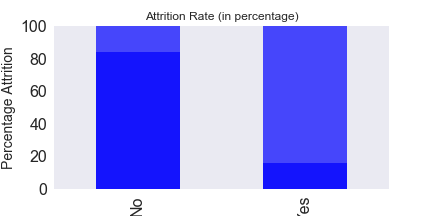

In [343]:
hr_data.Attrition.value_counts().plot(kind='bar',
                                  figsize=(6,3),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=13)
plt.title('Attrition rate (in numbers)')
plt.grid()
plt.show()

###### Attrition rate in percentage (pandas)

In [344]:
((hr_data.Attrition.value_counts()/sum(hr_data.Attrition.value_counts()))*100).plot(kind='bar',
                                  figsize=(6,3),
                                  color=["blue"],
                                  alpha = 0.7,
                                  fontsize=16)

plt.ylim([0,100])
plt.title('Attrition Rate (in percentage)')
plt.ylabel('Percentage Attrition',fontsize = 14)
plt.grid()
plt.show()

###### Using seaborn

In [345]:
sns.set(font_scale=1)

In [346]:
hr_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<IPython.core.display.Javascript object>


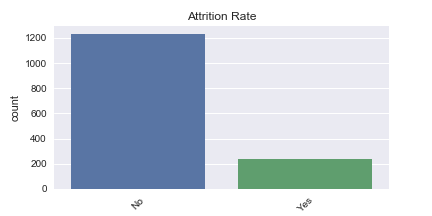

In [347]:
# Setting figure parameters 
plt.figure(figsize = (6,3))
sns.set(style="darkgrid")
# Plot
sns.countplot(x='Attrition', data=hr_data).set_title('Attrition Rate')
# Setting labels
plt.xticks(rotation = 45)
plt.show()

<IPython.core.display.Javascript object>


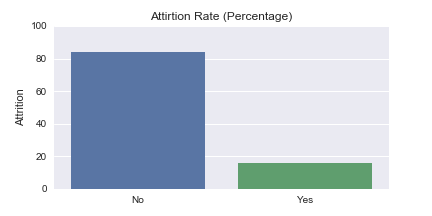

In [348]:
plt.figure(figsize = (6,3))

temp = pd.DataFrame(hr_data.Attrition.value_counts()/sum(hr_data.Attrition.value_counts())*100)
sns.barplot(temp.index,temp.Attrition).set_title('Attirtion Rate (Percentage)')

#Setting y limits
plt.ylim([0,100])
plt.show()

### Gender Distribution in the company

In [349]:
temp = hr_data.Gender.value_counts()
temp

Male      882
Female    588
Name: Gender, dtype: int64

In [350]:
data = [go.Bar(
            x=temp.index,
            y=temp.values
    )]
layout = go.Layout(
    autosize=False,
    width=400,
    height=400,title = "Gender Distribution",
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Attrition and Gender

In [351]:
Gender_Attrition = hr_data.groupby(['Gender','Attrition']).size().to_frame()

In [352]:
Gender_Attrition = Gender_Attrition.reset_index()

In [353]:
Gender_Attrition.columns = ['Gender','Attrition','Count']

In [354]:
Gender_Attrition

,Gender,Attrition,Count
0,Female,No,501
1,Female,Yes,87
2,Male,No,732
3,Male,Yes,150


In [355]:
Gender_Attrition.Attrition[Gender_Attrition.Gender=='Male']

2     No
3    Yes
Name: Attrition, dtype: category
Categories (2, object): [No, Yes]

In [356]:
trace1 = go.Bar(x = Gender_Attrition.Attrition[Gender_Attrition.Gender=='Male'],
               y = Gender_Attrition.Count[Gender_Attrition.Gender=='Male'],
               name = 'Male')
trace2 = go.Bar(x = Gender_Attrition.Attrition[Gender_Attrition.Gender=='Female'],
               y = Gender_Attrition.Count[Gender_Attrition.Gender=='Female'],
               name = 'Female')
data = [trace1,trace2]
layout = go.Layout(width = 600,
                   height = 400,title = 'Gender and Attrition')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Gender and Distance from home

<IPython.core.display.Javascript object>


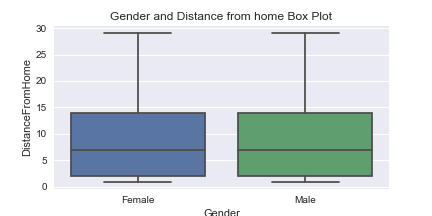

In [357]:
plt.figure(figsize = (6,3))
sns.boxplot(hr_data.Gender,hr_data.DistanceFromHome).set_title('Gender and Distance from home Box Plot')
plt.show()

#### With plotly

In [358]:
trace1 = go.Box(y = hr_data.DistanceFromHome[hr_data.Gender=='Male'],name = 'Male',
                boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = hr_data.DistanceFromHome[hr_data.Gender=='Female'],name= 'Female',
               boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 1000,
                   height = 500,title = 'Distance from home and Gender')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

### Let us bin the distance column

In [359]:
hr_data['Distance_Bins']=(np.digitize(hr_data.DistanceFromHome,[0,5,15,np.max(hr_data.DistanceFromHome)],right=True))

In [360]:
hr_data.groupby(['Distance_Bins','Gender']).size()

Distance_Bins  Gender
1              Female    257
               Male      375
2              Female    200
               Male      309
3              Female    131
               Male      198
dtype: int64

In [361]:
hr_data.groupby(['Distance_Bins','Gender']).size().to_frame()

0
Distance_Bins Gender     
1             Female  257
              Male    375
2             Female  200
              Male    309
3             Female  131
              Male    198

In [362]:
distance_gender = hr_data.groupby(['Distance_Bins','Gender']).size().to_frame().reset_index()

In [363]:
distance_gender.columns = ['Distance_Bins','Gender','Count']

In [364]:
distance_gender

,Distance_Bins,Gender,Count
0,1,Female,257
1,1,Male,375
2,2,Female,200
3,2,Male,309
4,3,Female,131
5,3,Male,198


## Distance Bins and Gender

In [365]:
distance_gender.Count[distance_gender.Gender=='Male']

1    375
3    309
5    198
Name: Count, dtype: int64

In [366]:
trace1 = go.Bar(x = distance_gender.Distance_Bins[distance_gender.Gender=='Male'],
               y = distance_gender.Count[distance_gender.Gender=='Male'],
                text = distance_gender.Count[distance_gender.Gender=='Male'],
                textposition = 'auto',
               name = 'Male')
trace2 = go.Bar(x = distance_gender.Distance_Bins[distance_gender.Gender=='Female'],
               y = distance_gender.Count[distance_gender.Gender=='Female'],
                text = distance_gender.Count[distance_gender.Gender=='Female'],
                textposition = 'auto',
               name = 'Female')
data = [trace1,trace2]
layout = go.Layout(width = 700,
                   height = 500,title = 'Gender and Distance bins')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Years at company and Attrition

<IPython.core.display.Javascript object>


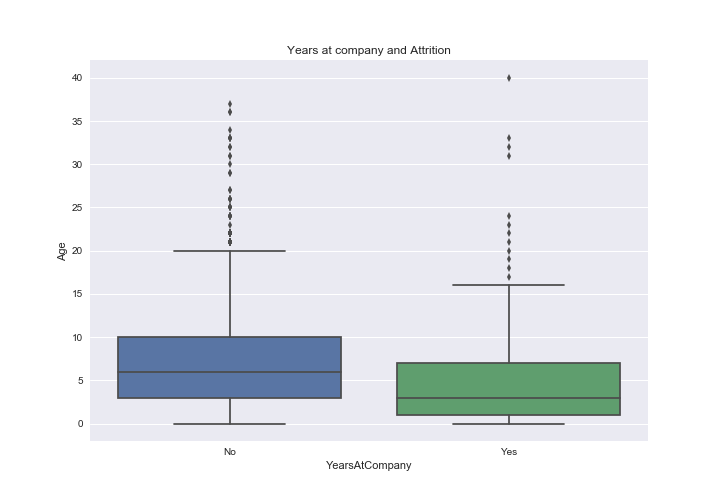

In [367]:
plt.figure(figsize = (10,7))

sns.boxplot(hr_data.Attrition,hr_data.YearsAtCompany)
plt.title('Years at company and Attrition')
plt.xlabel('YearsAtCompany')
plt.ylabel('Age')
plt.show()

##### With plotly

In [368]:
trace1 = go.Box(y = hr_data.YearsAtCompany[hr_data.Attrition=='Yes'],name = 'Yes',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = hr_data.YearsAtCompany[hr_data.Attrition=='No'],name= 'No',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'YearsAtCompany and Attrition')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

## Age and Attrition

In [369]:
trace1 = go.Box(y = hr_data.Age[hr_data.Attrition=='Yes'],name = 'Yes')
trace2 = go.Box(y = hr_data.Age[hr_data.Attrition=='No'],name= 'No')

data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Age and Attrition')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

## Years at company and Age

<IPython.core.display.Javascript object>


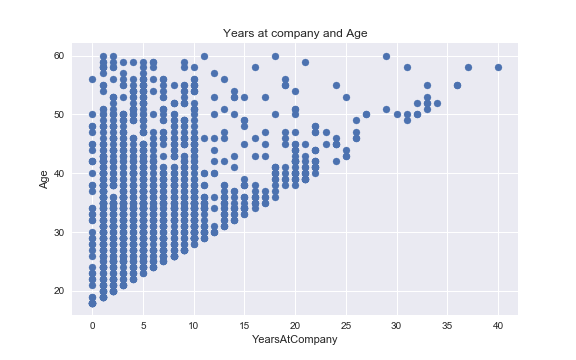

In [430]:
plt.figure(figsize = (8,5))

plt.scatter(x = hr_data.YearsAtCompany,y = hr_data.Age)
plt.title('Years at company and Age')
plt.xlabel('YearsAtCompany')
plt.ylabel('Age')
plt.show()


In [431]:
# list(zip( hr_data.YearsAtCompany, hr_data.Age))

In [432]:
trace1 = go.Scatter(x = hr_data.YearsAtCompany,y = hr_data.Age, 
#                     text  = list(zip( hr_data.YearsAtCompany, hr_data.Age)),
                            text  = hr_data.Age,
#                     textposition = 'auto',
                    hoverinfo = 'text',
                    mode = 'markers',
                   marker= dict(size= 8,
#                     opacity= 0.8
                   )
                   )
data = [trace1]
fig = go.Figure(data = data)
layout = go.Layout(width = 900,
                   height = 600,title = 'Years in company and Age',
                  xaxis= dict(title= 'Years in company'),
                yaxis=dict(title= 'Age'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Let us bin the age

In [433]:
hr_data['Age_Bins'] = np.digitize(hr_data.Age,[0,25,50],right=True)

In [434]:
hr_data['Age_Bins'].value_counts()

2    1204
3     143
1     123
Name: Age_Bins, dtype: int64

In [435]:
hr_data.Age_Bins = hr_data.Age_Bins.replace(to_replace=[1,2,3],value=['Bin1','Bin2','Bin3'])

In [436]:
age_gender = hr_data.groupby(['Age_Bins','Gender']).size().to_frame().reset_index()
age_gender.columns = ['Age_Bins','Gender','Count']
age_gender

,Age_Bins,Gender,Count
0,Bin1,Female,43
1,Bin1,Male,80
2,Bin2,Female,481
3,Bin2,Male,723
4,Bin3,Female,64
5,Bin3,Male,79


In [500]:
age_gender.Age_Bins[age_gender.Gender=='Male']

1    Bin1
3    Bin2
5    Bin3
Name: Age_Bins, dtype: object

In [437]:
trace1 = go.Bar(x = age_gender.Age_Bins[age_gender.Gender=='Male'],
               y = age_gender.Count[age_gender.Gender=='Male'],
                text = age_gender.Count[age_gender.Gender=='Male'],
                textposition = 'auto',
               name = 'Male')
trace2 = go.Bar(x = age_gender.Age_Bins[age_gender.Gender=='Female'],
               y = age_gender.Count[age_gender.Gender=='Female'],
                text = age_gender.Count[age_gender.Gender=='Female'],
                textposition = 'auto',
               name = 'Female')
data = [trace1,trace2]
layout = go.Layout(width = 700,
                   height = 500,title = 'Gender and Age bins')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Monthly income vs Attrition

In [438]:
color_seq = []
for i in hr_data.Attrition:
    if i =='Yes':
        color_seq.append('red')
    else:
        color_seq.append('green')

<IPython.core.display.Javascript object>


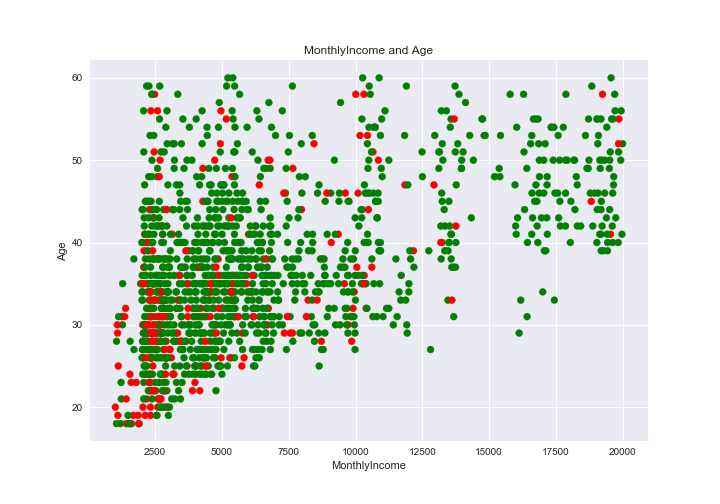

In [439]:
plt.figure(figsize = (10,7))
plt.scatter(x = hr_data.MonthlyIncome,y = hr_data.Age,color = color_seq)
plt.title('MonthlyIncome and Age')
plt.xlabel('MonthlyIncome')
plt.ylabel('Age')
plt.show()

In [440]:
trace1 = go.Scatter(x = hr_data.MonthlyIncome,y = hr_data.Age, 
#                     text  = list(zip( hr_data.YearsAtCompany, hr_data.Age)),
                            text  = hr_data.Age,
#                     textposition = 'auto',
                    hoverinfo = 'text',
                    mode = 'markers',
                  
                    marker = dict(size = 10,
                                  color = color_seq)
                   )
data = [trace1]
fig = go.Figure(data = data)
layout = go.Layout(width = 900,
                   height = 600,title = 'Years in company and Age',
                  xaxis= dict(title= 'Monthly Income'),
                yaxis=dict(title= 'Age'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [441]:
import plotly.figure_factory as ff

##### Facet grid

In [442]:
fig = ff.create_facet_grid(
    hr_data,
    x='MonthlyIncome',
    y='Age',
    color_name='Attrition',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'Yes': 'rgb(255, 0, 0)', 'No': 'rgb(0, 255, 0)'}
)
iplot(fig)

## JobSatisfaction and Attrition

### Tree map

reference https://python-graph-gallery.com/treemap/


In [443]:
import squarify
jobsat_att =hr_data.groupby(['JobSatisfaction','Attrition']).size().to_frame().reset_index()
jobsat_att.columns = ['JobSatisfaction','Attrition','value']

Out of the people who left, what is the job satisfaction level

<IPython.core.display.Javascript object>


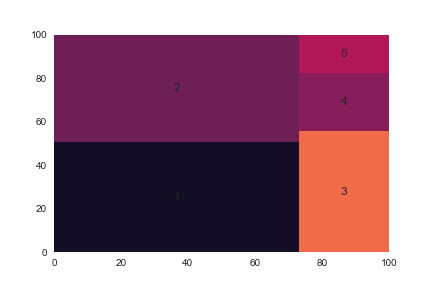

In [444]:
plt.figure()
squarify.plot(sizes = hr_data.JobLevel.value_counts().values,
             label =hr_data.JobLevel.value_counts().index)
plt.show()

### Number of companies worked, Age ,Attrition

In [445]:
hr_data.NumCompaniesWorked.value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

<IPython.core.display.Javascript object>


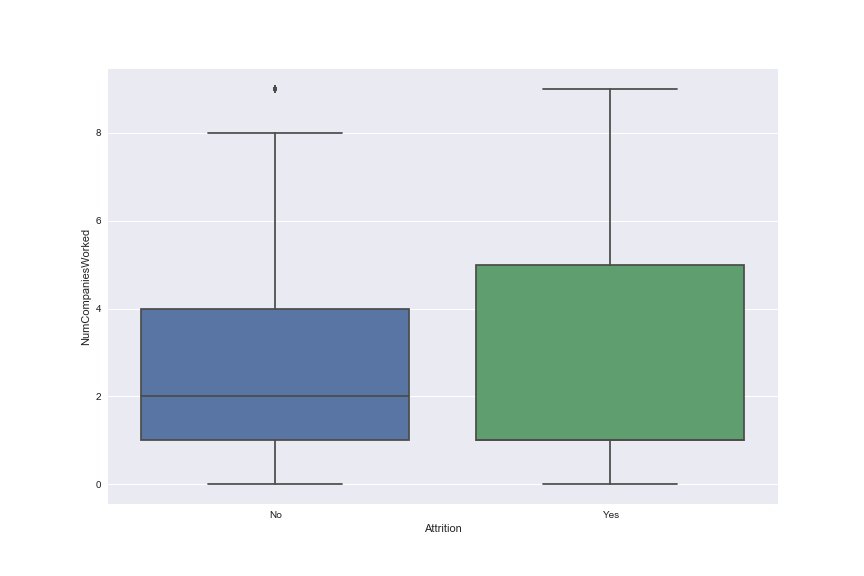

In [446]:
plt.figure(figsize = (12,8))
sns.boxplot(hr_data.Attrition,hr_data.NumCompaniesWorked)

####  Let us now add age

In [459]:
fig = ff.create_facet_grid(
    hr_data,
    x='NumCompaniesWorked',
    y='Age',
    color_name='Attrition',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'Yes': 'rgb(255, 0, 0)', 'No': 'rgb(0, 255, 0)'}
)
# layout = go.Layout(title = "A")
iplot(fig)

### Generate a new feature  using Age and Number of companies worked

In [463]:
hr_data['Age_NumCompWorked'] = np.round(hr_data.Age / (hr_data.NumCompaniesWorked+1)) # adding 1 to avoid dividng by 0

In [464]:
hr_data.Age_NumCompWorked.head()

0     5.0
1    24.0
2     5.0
3    16.0
4     3.0
Name: Age_NumCompWorked, dtype: float64

In [470]:
trace0 = go.Box(y= hr_data.Age_NumCompWorked[hr_data.Attrition=='Yes'],name = 'Yes')
trace1 = go.Box(y = hr_data.Age_NumCompWorked[hr_data.Attrition=='No'],name = 'No')
data =[trace0,trace1]
layout = go.Layout(width = 900,
                   height = 600,
                   title = 'Ratio of Age and Number of Companies worked vs Attrition')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Generate a new feature  using TotalWorkingYears and Number of companies worked

In [474]:
hr_data['TotYears_NumComp'] = np.round(hr_data.TotalWorkingYears / (hr_data.NumCompaniesWorked+1))

In [475]:
hr_data.TotYears_NumComp.head()

0    1.0
1    5.0
2    1.0
3    4.0
4    1.0
Name: TotYears_NumComp, dtype: float64

In [476]:
trace0 = go.Box(y= hr_data.TotYears_NumComp[hr_data.Attrition=='Yes'],name = 'Yes')
trace1 = go.Box(y = hr_data.TotYears_NumComp[hr_data.Attrition=='No'],name = 'No')
data =[trace0,trace1]
layout = go.Layout(width = 900,
                   height = 600,
                   title = 'Ratio of Total Working Years and Number of Companies worked vs Attrition')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Percent Salary Hike and Performance Rating

In [483]:
perfhike_perfrating_df = hr_data.groupby(['PerformanceRating','PercentSalaryHike']).size().to_frame().reset_index()

In [493]:
perfhike_perfrating_df.columns = ['PerformanceRating','PercentSalaryHike','Count']

In [494]:
perfhike_perfrating_df

,PerformanceRating,PercentSalaryHike,Count
0,3,11,210
1,3,12,198
2,3,13,209
3,3,14,201
4,3,15,101
5,3,16,78
6,3,17,82
7,3,18,89
8,3,19,76
9,4,20,55


In [495]:
trace0 = go.Bar(x = perfhike_perfrating_df.PercentSalaryHike[perfhike_perfrating_df.PerformanceRating==3],
                y = perfhike_perfrating_df.Count[perfhike_perfrating_df.PerformanceRating==3],
                name = '3' )
trace1 = go.Bar(x = perfhike_perfrating_df.PercentSalaryHike[perfhike_perfrating_df.PerformanceRating==4] ,
                y = perfhike_perfrating_df.Count[perfhike_perfrating_df.PerformanceRating==4],
                name= '4')
data = [trace0,trace1]
layout = go.Layout(width = 900,
                   height = 600,
                   title = 'Ratio of Total Working Years and Number of Companies worked vs Attrition')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### YearsWithCurrManager, JobSatisfaction

<IPython.core.display.Javascript object>


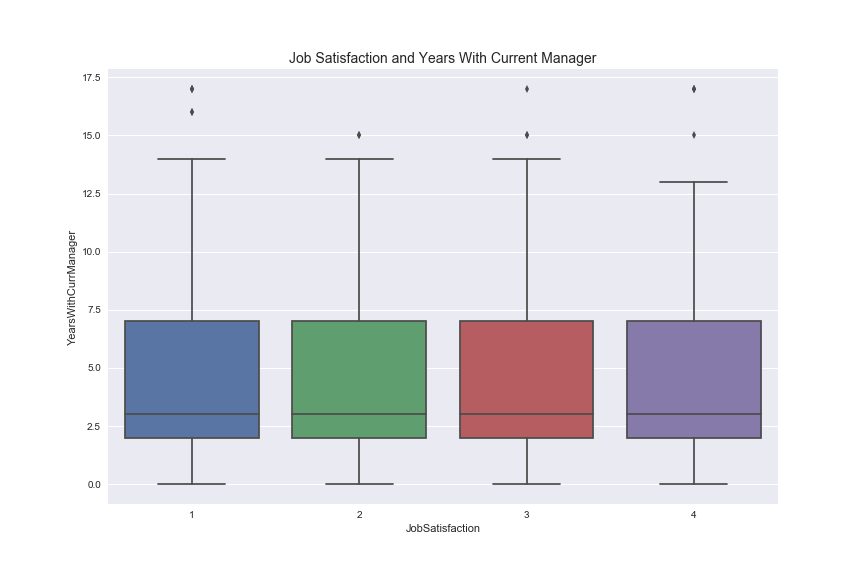

In [496]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(hr_data.JobSatisfaction,hr_data.YearsWithCurrManager)
plt.title('Job Satisfaction and Years With Current Manager',fontsize = 14)

plt.show()

### YearsWithCurrManager, JobSatisfaction, Attrition

<IPython.core.display.Javascript object>


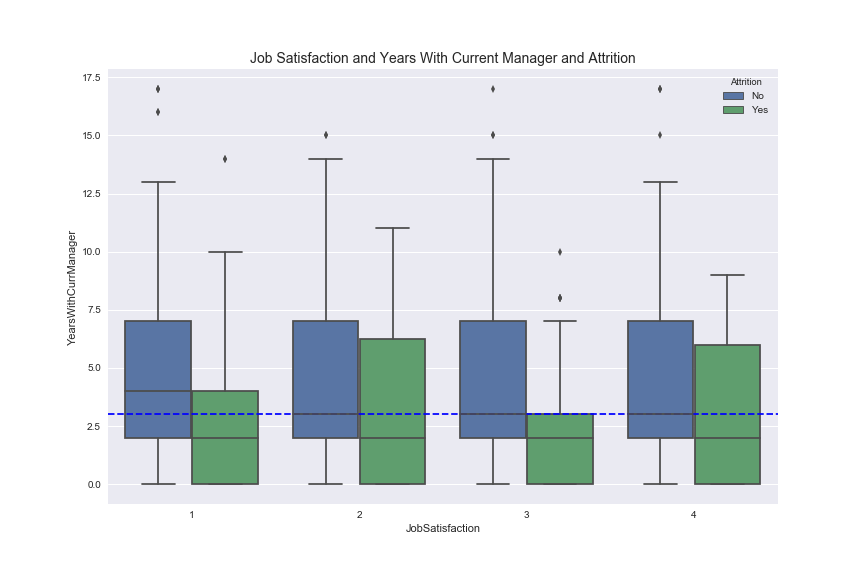

In [518]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(hr_data.JobSatisfaction,hr_data.YearsWithCurrManager,hr_data.Attrition)
plt.title('Job Satisfaction and Years With Current Manager and Attrition',fontsize = 14)
plt.axhline(y = 3,color='b', linestyle='--')
plt.show()

More attrition among the employees who spent less than 2 years with the manager

### Marital status and Distance from home

<IPython.core.display.Javascript object>


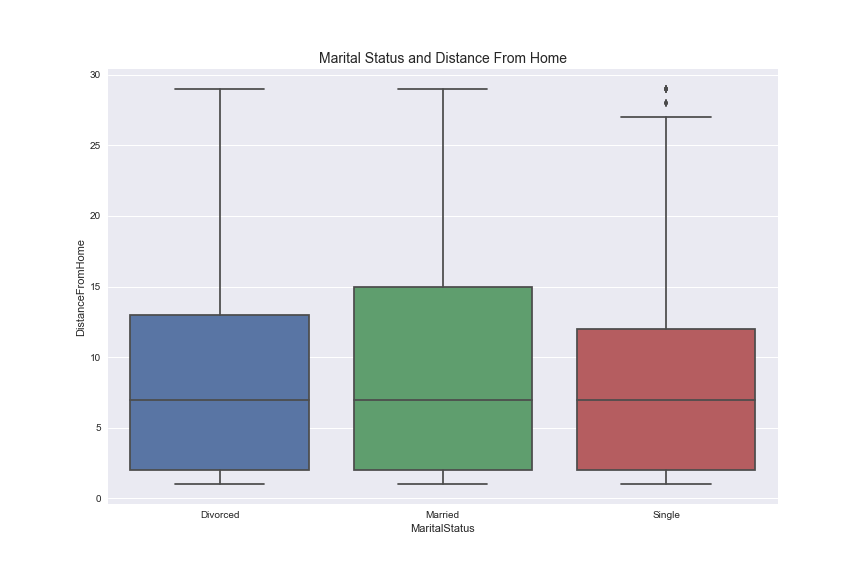

In [519]:
# Accessing figure parameters
fig, ax = plt.subplots(figsize = (12,8))
#Plot
sns.boxplot(hr_data.MaritalStatus,hr_data.DistanceFromHome)
#Plot title
plt.title('Marital Status and Distance From Home',fontsize = 14)
plt.show()

### Marital Status and Distace From Home and Attrition


<IPython.core.display.Javascript object>


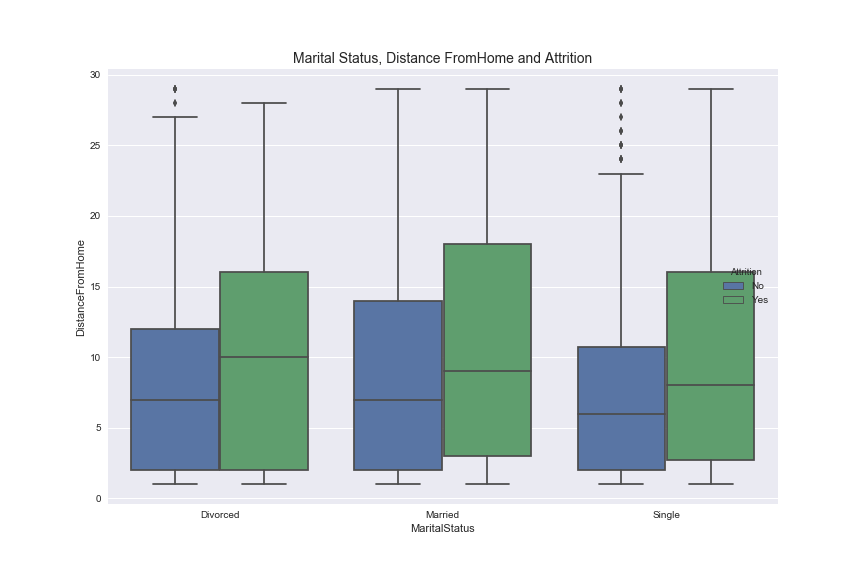

In [520]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(hr_data.MaritalStatus,hr_data.DistanceFromHome,hr_data.Attrition)
plt.title('Marital Status, Distance FromHome and Attrition',fontsize = 14)
plt.show()

### Extras

#### Attrition by department

In [522]:
## Attrition per departmen
dept1_attr = pd.DataFrame(hr_data[hr_data.Department=='Human Resources'].Attrition.value_counts()/np.sum(hr_data[hr_data.Department=='Human Resources'].Attrition.value_counts()))*100#.reset_index()
dept2_attr = pd.DataFrame(hr_data[hr_data.Department=='Research & Development'].Attrition.value_counts()/np.sum(hr_data[hr_data.Department=='Research & Development'].Attrition.value_counts()))*100#.reset_index()
dept3_attr = pd.DataFrame(hr_data[hr_data.Department=='Sales'].Attrition.value_counts()/np.sum(hr_data[hr_data.Department=='Sales'].Attrition.value_counts()))*100#.reset_index()

In [525]:
dept1_attr

,Attrition
No,80.952381
Yes,19.047619


<IPython.core.display.Javascript object>


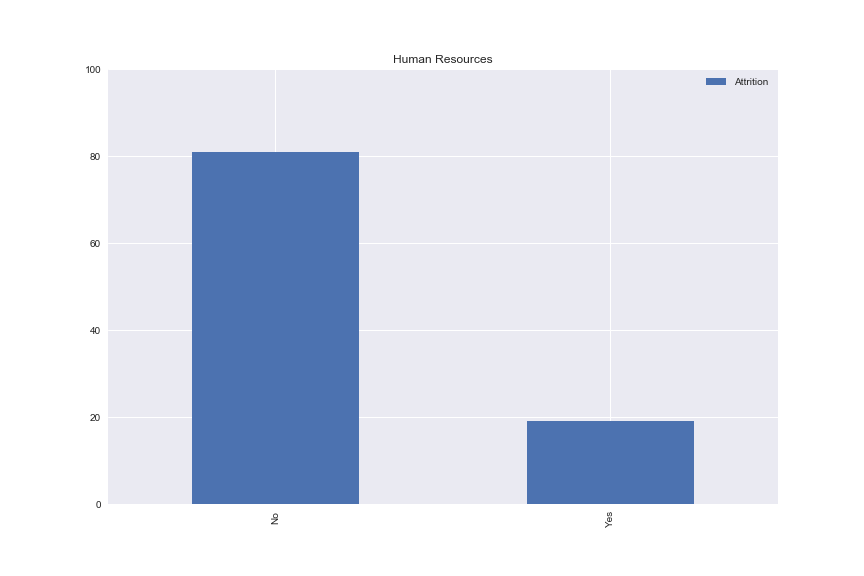

In [526]:
##### Baplot of Attrition per department using inbuilt pandas functionalities
dept1_attr.plot(kind='bar',grid=True,figsize = (12,8))
plt.title('Human Resources')
plt.ylim([0,100])
plt.show()

###### Using seaborn

<IPython.core.display.Javascript object>


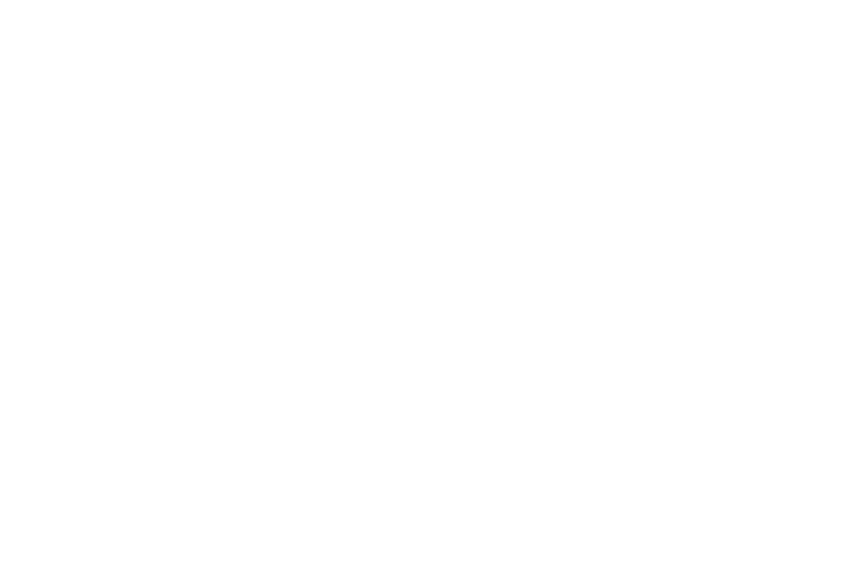

In [527]:
plt.figure(figsize = (12,8))
sns.barplot(dept1_attr.index,dept1_attr.Attrition)
plt.show()

In [529]:
department_wise_attrition = hr_data.groupby(['Department','Attrition']).size().unstack(fill_value=0)
department_wise_attrition

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


In [530]:
type(department_wise_attrition)

pandas.core.frame.DataFrame

<IPython.core.display.Javascript object>


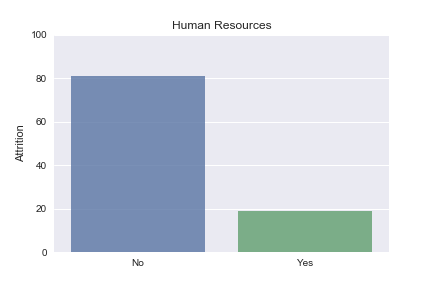

<IPython.core.display.Javascript object>


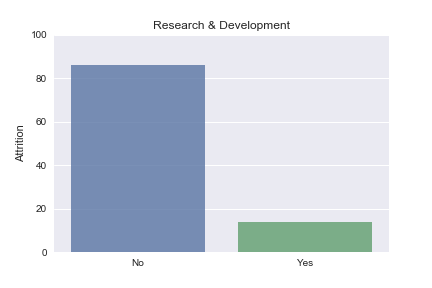

<IPython.core.display.Javascript object>


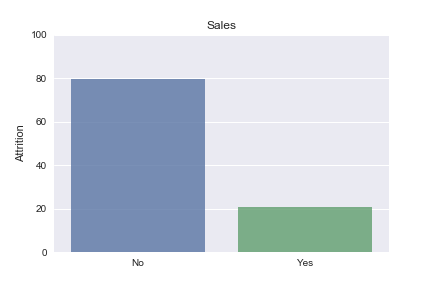

In [531]:

# Let us plot the graphs for all the department
departments = [i for i in department_wise_attrition.index]
for i,j in zip(departments,[dept1_attr,dept2_attr,dept3_attr]):
    plt.figure(figsize = (6,4))
    plt.ylim([0,100])
    sns.barplot(j.index,j.Attrition,alpha = 0.8).set_title(i)
#     plt.title(i)
    plt.show()

<IPython.core.display.Javascript object>


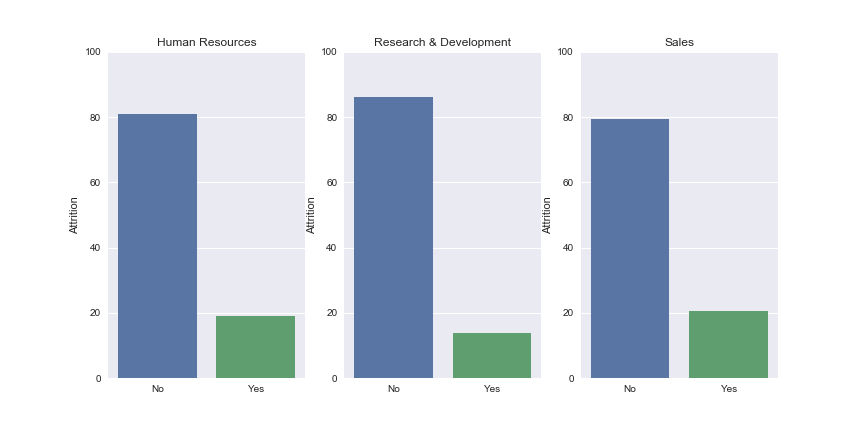

In [532]:
fig,ax = plt.subplots(figsize = (12,6)) # Setting the figure and axis
# Let us plot the graphs for all the department side by side
departments = [i for i in department_wise_attrition.index]
for i,j,n in zip(departments,[dept1_attr,dept2_attr,dept3_attr],[1,2,3]):
    plt.subplot(1,3,n)
    plt.ylim([0,100])
    sns.barplot(j.index,j.Attrition).set_title(i)
#     plt.title(i)
plt.show()

### Plotting the attrition rate for each of the deparments side by side using matplotlib

<IPython.core.display.Javascript object>


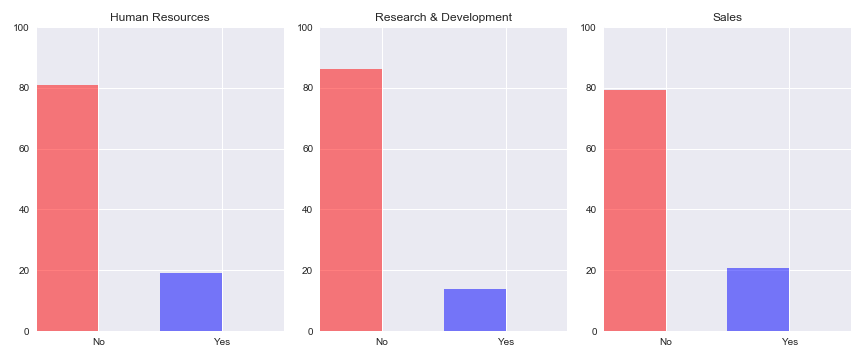

C:\Users\chait\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



In [533]:
pos = list(range(len(dept1_attr.Attrition)))
width = 0.5

fig,ax = plt.subplots(figsize = (12,5)) # Accessing the figure and the axes elements

# Access the axes elements of the plot
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
# Set title for the plot
ax1.title.set_text(department_wise_attrition.index[0])
ax2.title.set_text(department_wise_attrition.index[1])
ax3.title.set_text(department_wise_attrition.index[2])

# Set the position of the x ticks
ax1.set_xticks([p for p in pos])
ax2.set_xticks([p for p in pos])
ax3.set_xticks([p for p in pos])

# Set the labels for the x ticks
ax1.set_xticklabels(dept1_attr.index)
ax2.set_xticklabels(dept2_attr.index)
ax3.set_xticklabels(dept3_attr.index)

## Plot the first plot
plt.subplot(1,3,1) # Access the first plot of the grid
# plot a bar plot
plt.bar([p -width/2 for p in pos], # setting the x axis points
        #using  dept1_attr.Attrition hr_data,
        dept1_attr.Attrition,
        # of width
        width, 
        # with alpha 0.5 which is related to transparency
        alpha=0.5, 
        # with color
        color=['red','blue'],
        # with label the second value in index
        label=['No','Yes']) 
# Setting x and y limits
plt.xlim(min(pos)-width, max(pos)+width)
plt.ylim([0,100])
# plt.grid()


## Plot the second plot

plt.subplot(1,3,2)
# plot a bar plot

plt.bar([p -width/2 for p in pos], 
        #using department_wise_attrition.Yes hr_data,
        dept2_attr.Attrition,
        # of width
        width, 
        # with alpha 0.5 which is related to transparency
        alpha=0.5, 
        # with color
        color=['red','blue'],
        # with label the second value in index
        label=['No','Yes']) 
# Setting x and y limits
plt.xlim(min(pos)-width, max(pos)+width)
plt.ylim([0,100])
# plt.grid()

## Plot the second plot

plt.subplot(1,3,3)
# plot a bar plot

plt.bar([p -width/2 for p in pos], 
        #using department_wise_attrition.Yes hr_data,
        dept3_attr.Attrition,
        # of width
        width, 
        # with alpha 0.5 which is related to transparency
        alpha=0.5, 
        # with color
        color=['red','blue'],
        # with label the second value in index
        label=['No','Yes']) 
# Setting x and y limits
plt.xlim(min(pos)-width, max(pos)+width)
plt.ylim([0,100])
# plt.grid()

plt.tight_layout()
plt.show()

### Plotting Department wise attrition in one plot (using inbuilt functions)

C:\Users\chait\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


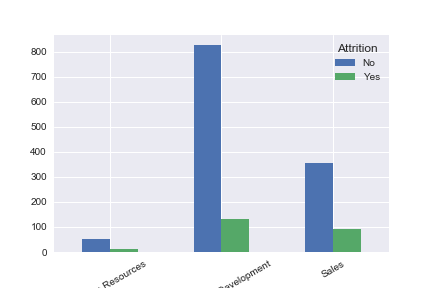

In [534]:
department_wise_attrition.plot(kind='bar')
plt.xticks(rotation = 30)
plt.show()

###### Histogram

### Age

C:\Users\chait\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


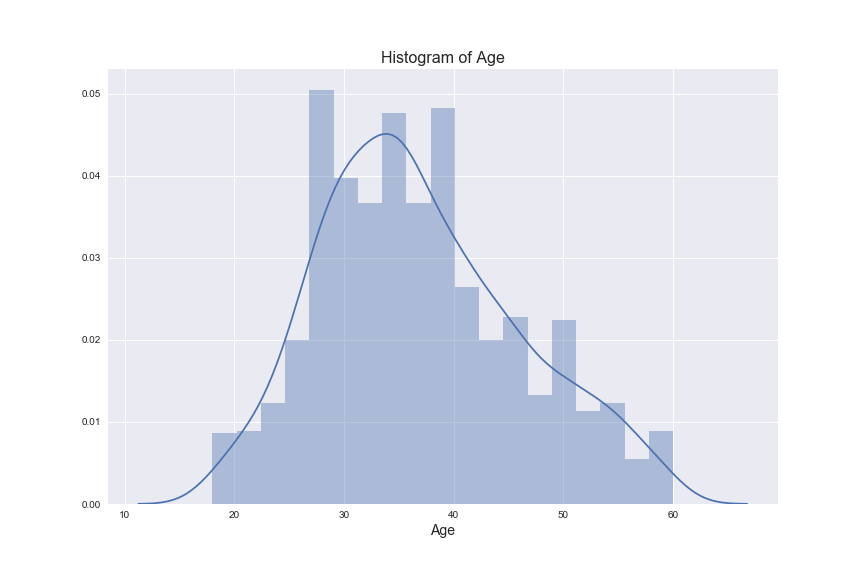

In [535]:
plt.figure(figsize = (12,8))
b = sns.distplot(hr_data.Age)
b.set_title('Histogram of Age',fontsize = 16)
b.set_xlabel("Age",fontsize=14)
plt.show()

### FacetGrid for Age

C:\Users\chait\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


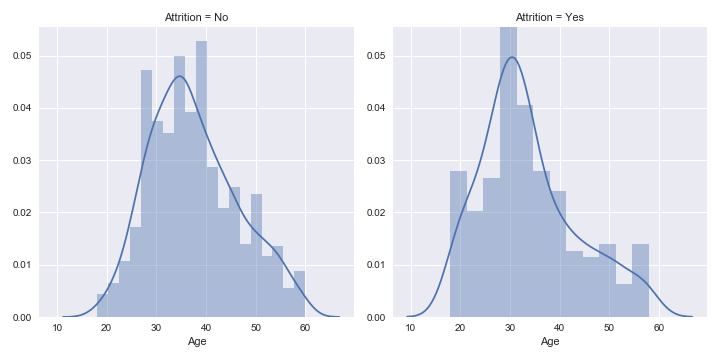

In [536]:
g = sns.FacetGrid(hr_data,col='Attrition',size = 5)
g.map(sns.distplot,'Age')
plt.show()

Activity : Plot the distribution of MonthlyIncome

In [592]:
### Job Level

In [593]:
# sns.boxplot?

In [594]:
# fig,ax = plt.subplots(figsize = (12,8))
# g = sns.boxplot(x="JobLevel",y= 'Age', hue="Attrition", hr_data=hr_data)

# plt.title('Job Level and Attrition rate',fontsize = 16)
# plt.ylim ([0,70])

# plt.ylabel("Age",fontsize=12)
# plt.xticks([0,1,2,3,4],['Low','Medium','High','Very High','Executive'])
# plt.xlabel("JobLevel",fontsize=12)
# plt.show()

In [595]:
worklife_attr = hr_data.groupby(['WorkLifeBalance','Attrition']).size().unstack()#.reset_index()

In [596]:
worklife_attr

Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


### Stacked bar chart 

###### Employee Attrition by Work Life Balance.

C:\Users\chait\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


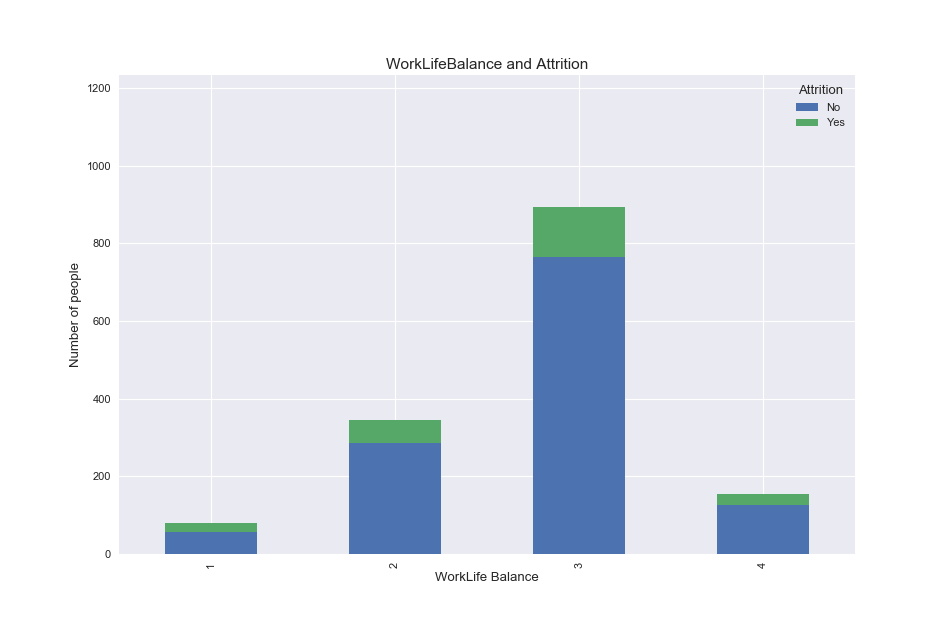

In [597]:
ct = pd.crosstab(hr_data.WorkLifeBalance, hr_data.Attrition)
ct.plot.bar(stacked=True,figsize = (12,8))

plt.title('WorkLifeBalance and Attrition',fontsize = 14)
plt.xlabel('WorkLife Balance',fontsize = 12)
plt.ylabel('Number of people',fontsize = 12)

plt.legend(title='Attrition')
plt.ylim(0,max(sum(ct.values)))
plt.show()

Draw grouped bar chart

# 6. Scatter plot

###### Employee Attrition by years at company and years since last promotion.


C:\Users\chait\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


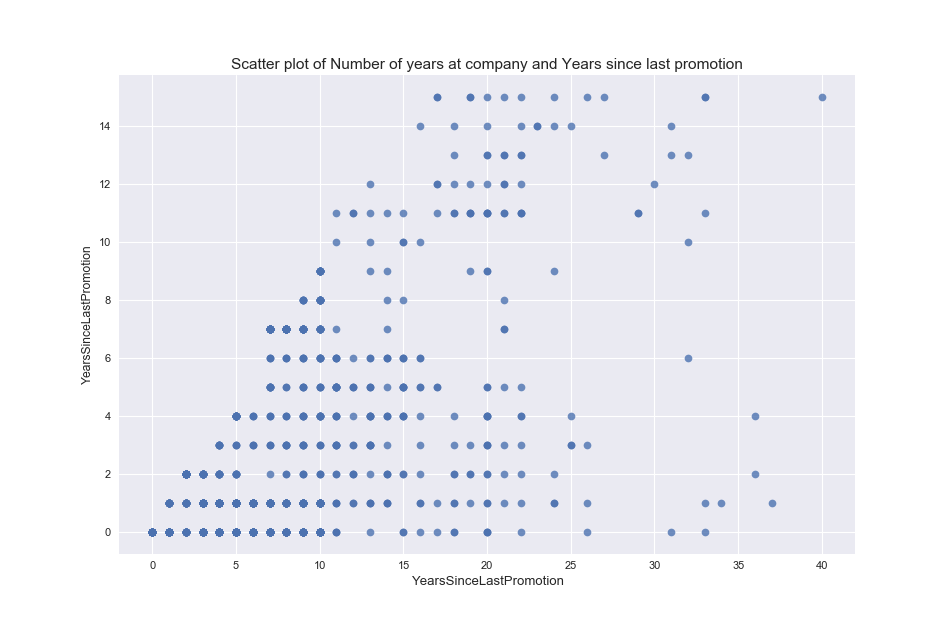

In [598]:
fig, ax = plt.subplots(figsize = (12,8))
sns.regplot(x = hr_data.YearsAtCompany,y = hr_data.YearsSinceLastPromotion,fit_reg= False)
plt.title("Scatter plot of Number of years at company and Years since last promotion",fontsize = 14)
plt.xlabel('YearsAtCompany',fontsize = 12)
plt.xlabel('YearsSinceLastPromotion',fontsize = 12)
plt.show()

### JobSatisfaction, YearsAtCompany, YearsSinceLastPromotion

In [602]:
js_e = pd.DataFrame(hr_data.groupby(['YearsAtCompany','YearsSinceLastPromotion','JobSatisfaction','Attrition']).size()).reset_index()

In [603]:
js_e.head()

,YearsAtCompany,YearsSinceLastPromotion,JobSatisfaction,Attrition,0
0,0,0,1,No,6
1,0,0,1,Yes,6
2,0,0,2,No,3
3,0,0,2,Yes,2
4,0,0,3,No,10


In [604]:
color_seq = []
for i in js_e.iloc[:,3]:
    if i =='Yes':
        color_seq.append('green')
    else :
        color_seq.append('blue')

In [605]:
color_seq[0:10]

['blue',
 'green',
 'blue',
 'green',
 'blue',
 'green',
 'blue',
 'green',
 'blue',
 'green']

In [606]:
%matplotlib notebook

<IPython.core.display.Javascript object>


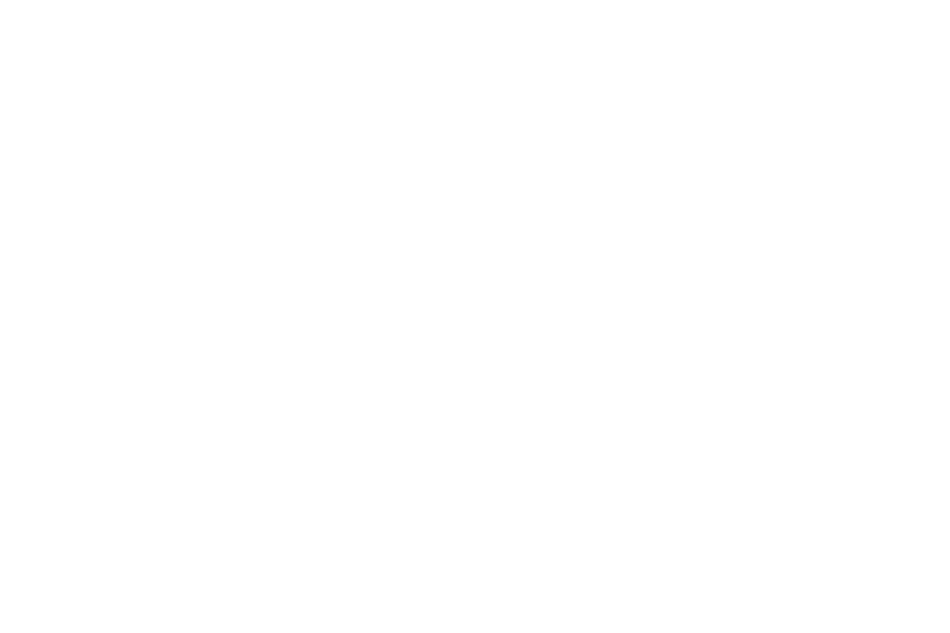

TypeError: Categorical cannot perform the operation *

In [607]:
fig,ax  = plt.subplots(figsize=(12,8))

ax.scatter(hr_data.YearsAtCompany,hr_data.YearsSinceLastPromotion,s=js_e.iloc[:,2]*35,c = color_seq)

plt.title("Years at company, Years since last promotion, Job Satisfaction and Attrition",size = 20)# plt.yticks([0,1,2,3,4,5]) 

plt.xlabel('YearsAtCompany')
plt.ylabel('YearsSinceLastPromotion')

plt.show()

### Education, YearsAtCompany, YearsSinceLastPromotion

<IPython.core.display.Javascript object>


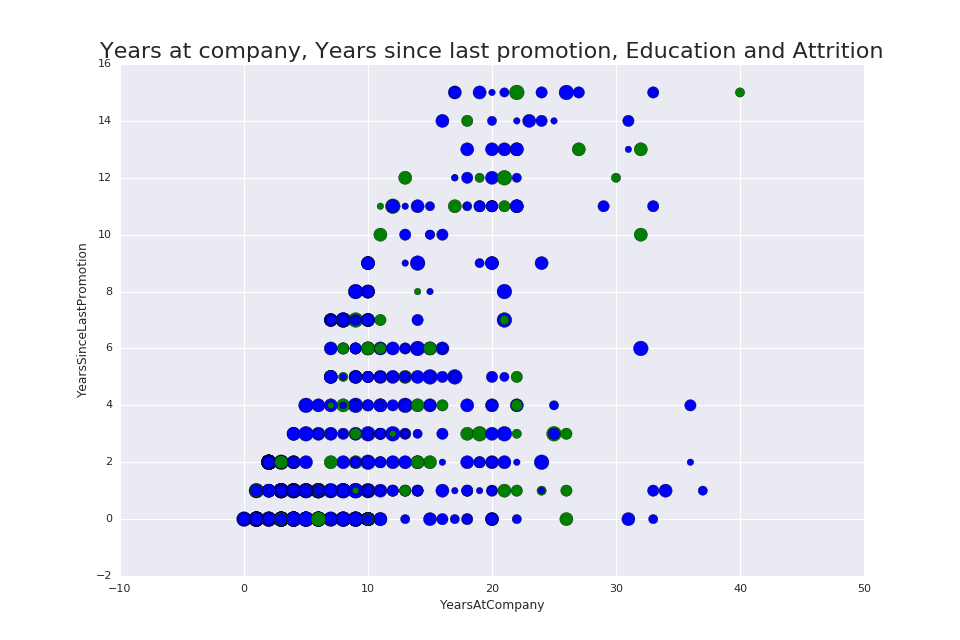

In [83]:
Yc_Yp_e = pd.hr_dataFrame(hr_data.groupby(['YearsAtCompany','YearsSinceLastPromotion','Education','Attrition']).size()).reset_index()
color_seq = []
for i in Yc_Yp_e.iloc[:,3]:
    if i =='Yes':
        color_seq.append('green')
    else :
        color_seq.append('blue')

fig,ax  = plt.subplots(figsize=(12,8))

ax.scatter(hr_data.YearsAtCompany,hr_data.YearsSinceLastPromotion,s=Yc_Yp_e.iloc[:,2]*35,c = color_seq)

plt.title("Years at company, Years since last promotion, Education and Attrition",size = 20)# plt.yticks([0,1,2,3,4,5]) 

plt.xlabel('YearsAtCompany')
plt.ylabel('YearsSinceLastPromotion')

plt.show()

https://plot.ly/python/3d-scatter-plots/

### 3D scatter plot

In [608]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


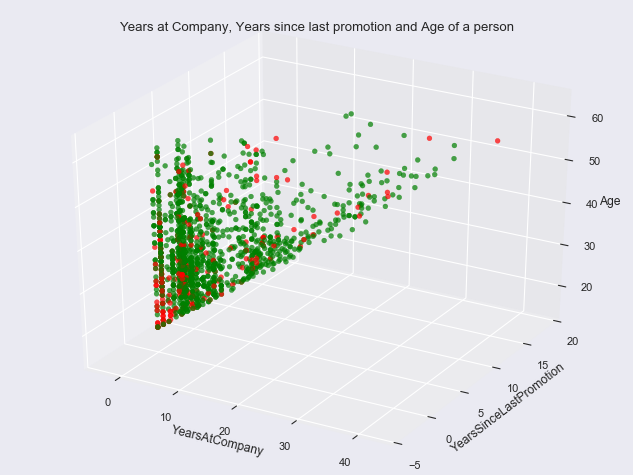

In [609]:
# I,port the 3D chart from matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Generating a sequence for the colors, based on attrition, Red for attrition, Green for no attrition
col_seq = []
for i in hr_data.Attrition:
    if i =='Yes':
        col_seq.append('r')
    else:
        col_seq.append('g')


# sns.set_style('darkgrid')
# Accessing/ Setting the firgure elements
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

n = 1500
# Extracting th x, y ,z  values 
sequence_containing_x_vals = hr_data.YearsAtCompany[0:n]
sequence_containing_y_vals = hr_data.YearsSinceLastPromotion[0:n]
sequence_containing_z_vals = hr_data.Age[0:n]

# Plot
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals,color=col_seq[0:n],
          alpha = 0.7)


## Setting x, y, z labels, Figure title
ax.set_xlabel("YearsAtCompany")
ax.set_ylabel("YearsSinceLastPromotion")
ax.set_zlabel("Age")
plt.title("Years at Company, Years since last promotion and Age of a person")
# Setting x,y,z limits
ax.set_xlim(min(hr_data.YearsAtCompany[0:n])-5,max(hr_data.YearsAtCompany[0:n])+5)
ax.set_ylim(min(hr_data.YearsSinceLastPromotion[0:n])-5,max(hr_data.YearsSinceLastPromotion[0:n])+5)
ax.set_zlim(min(hr_data.Age[0:n])-5,max(hr_data.Age[0:n])+5)
plt.show()

In [610]:
n = 1500
# Extracting th x, y ,z  values 
temp = hr_data.iloc[0:n,]
temp.shape

(1470, 35)

In [611]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [581]:
[ i for i in hr_data.columns if i not in cat_cols]

['Age',
 'DistanceFromHome',
 'EmployeeNumber',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Distance_Bins',
 'Age_Bins',
 'Age_NumCompWorked',
 'TotYears_NumComp']

In [612]:
trace1 = go.Scatter3d(
    x=temp.YearsAtCompany[temp.Attrition=='Yes'],
    y=temp.PercentSalaryHike[temp.Attrition=='Yes'],
    z=temp.DistanceFromHome[temp.Attrition=='Yes'],
    mode='markers',
    marker=dict(
        size=temp.YearsInCurrentRole[temp.Attrition=='No'],
        color='rgb(255,0,0)',
#         colorscale='Viridis',   # choose a colorscale
        opacity=0.9
    )
)

trace2 = go.Scatter3d(
    x=temp.YearsAtCompany[temp.Attrition=='No'],
    y=temp.PercentSalaryHike[temp.Attrition=='No'],
    z=temp.DistanceFromHome[temp.Attrition=='No'],
    mode='markers',
    marker=dict(
        size=temp.YearsInCurrentRole[temp.Attrition=='No'],
        color='rgb(0,255,0)',
#         colorscale='Viridis',   # choose a colorscale
        opacity=0.2
    )
)
data = [trace1,trace2]
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='YearsAtCompany'),
                    yaxis = dict(
                        title='PercentSalaryHike'),
                    zaxis = dict(
                        title='DistanceFromHome'),),
                    width=700,
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10)
                  )
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')
